In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin,lfilter

In [31]:
sample_rate = 1000
duration = 30
frequency =  20

In [32]:
t = np.arange(0, duration , 1/sample_rate)
sin_win = np.sin(2*np.pi*frequency*t)

In [33]:
noise_amplitude = 2
noise = np.random.normal(0 , noise_amplitude , len(sin_win))
x = noise + sin_win # 加一些高斯白噪声 , 输入信号

In [34]:
N = len(x)

In [35]:
P = firwin(32 , 0.1)
S = firwin(16 , 0.1)
Sh = firwin(16 , 0.1)
Xp = np.zeros(32)
W = np.zeros(24)
Xw = np.zeros(24)
Xs = np.zeros(16)
Y = np.zeros(16)
Xf = np.zeros(24)

d = np.zeros(N)
y = np.zeros(N)
ys = np.zeros(N)
e = np.zeros(N)
xf = np.zeros(N)

u = 0.001

In [36]:
for k in range(N):
    Xp[1:] = Xp[:-1]
    Xp[0] = x[k]
    d[k]= np.dot(Xp , P)
    
    Xw[1:] = Xw[:-1]
    Xw[0] = x[k]
    y[k] = np.dot(Xw , W)
    
    Y[1:] = Y[:-1]
    Y[0] = y[k]
    ys[k] = np.dot(Y , S)
    
    e[k] = d[k] - ys[k]
    
    Xs[1:] = Xs[:-1]
    Xs[0] = x[k]
    xf[k] = np.dot(Xs , Sh)
    
    Xf[1:]= Xf[:-1]
    Xf[0] = xf[k]
    W = W + u * e[k] *Xf

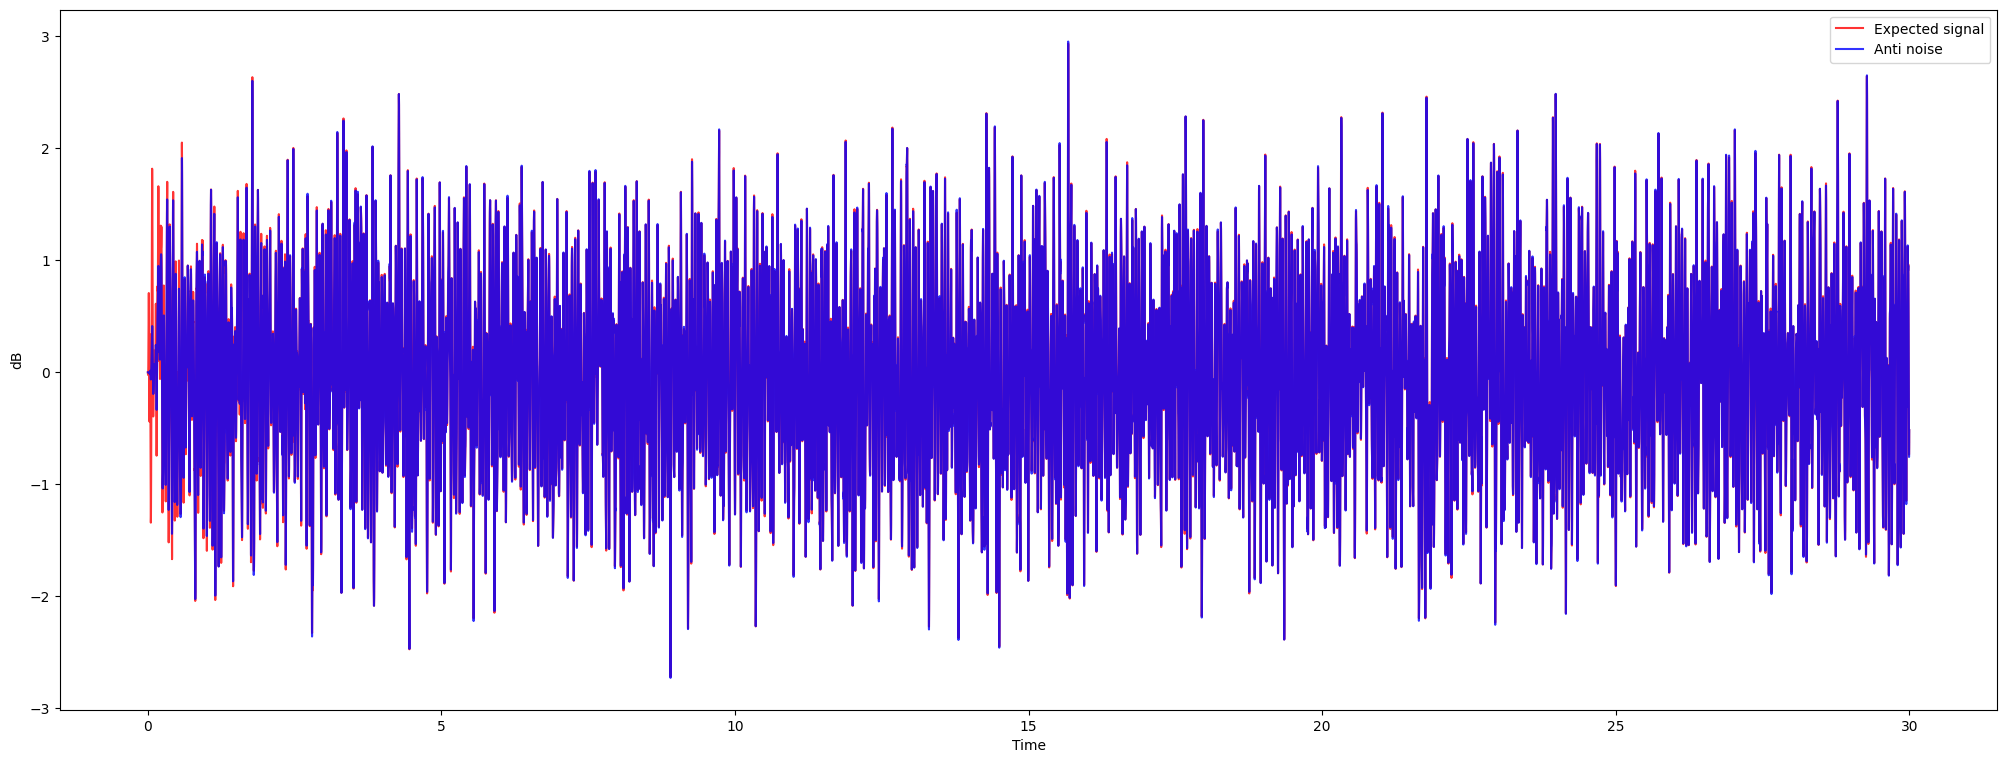

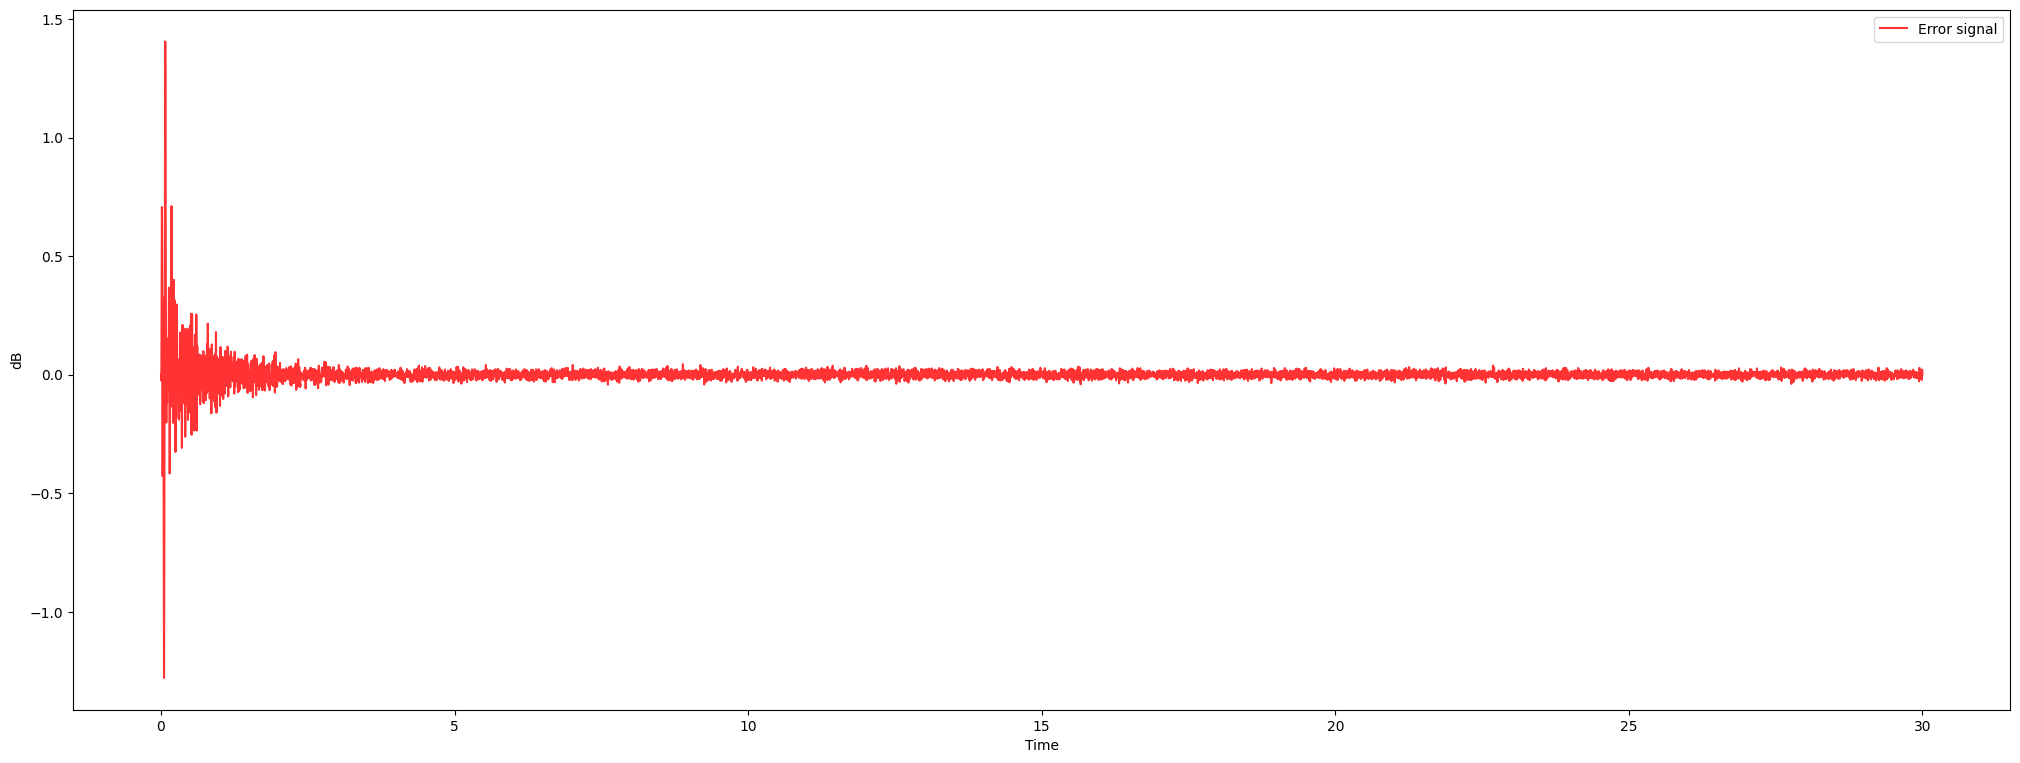

In [37]:
# plot1 
plt.figure(figsize=(25, 20))
plt.subplot(2,1,1)
plt.plot(t , d , 'r-' , alpha = 0.8 , label = 'Expected signal')
plt.plot(t , ys , 'b-', alpha = 0.8 , label = 'Anti noise')
plt.legend()
plt.xlabel('Time')
plt.ylabel('dB')
plt.show()

# plot2
plt.figure(figsize=(25, 20))
plt.subplot(2,1,2)
plt.plot(t , e , 'r-' , alpha = 0.8 , label = 'Error signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('dB')
plt.show()